# Multilayer Perceptron (MLP)

* **Arquitectura de un MLP**


* **Entrenamiento de un MLP**

**Deep Learning** o **Aprendizaje Profundo** es un conjunto de algoritmos de Machine Learning que se utilizan para modelar abstracciones de alto nivel contenidas en datos, en donde estos modelos computacionales implican el uso de transformaciones no lineales (distribuidas en múltiples capas) e iterativas entre espacios vectoriales (o tensoriales), comunmente conocidas como **Redes Neuronales Artificiales** o simplemente **Redes Neuronales**.

*  El concepto básico de las redes neuronales artificiales se construyó a partir de hipótesis y modelos sobre cómo funciona el cerebro humano para resolver tareas complejas (Neurona Artificial-McCulloch & Pitt, 1940).


* En un principio, no había forma de entrenar una red neuronal. En 1986, se descubrió y popularizó el **algoritmo Backpropagation** (Learning representations by backpropagating errors, David E. Rumelhart, Geoffrey E. Hinton, Ronald J. Williams, Nature, 323 (6088): 533-536, 1986).


* En la última década hemos vivido un gran avance en término de **infraestructura computacional y potencia de cómputo.**


**Primeramente, recordemos el modelo ADALINE:**

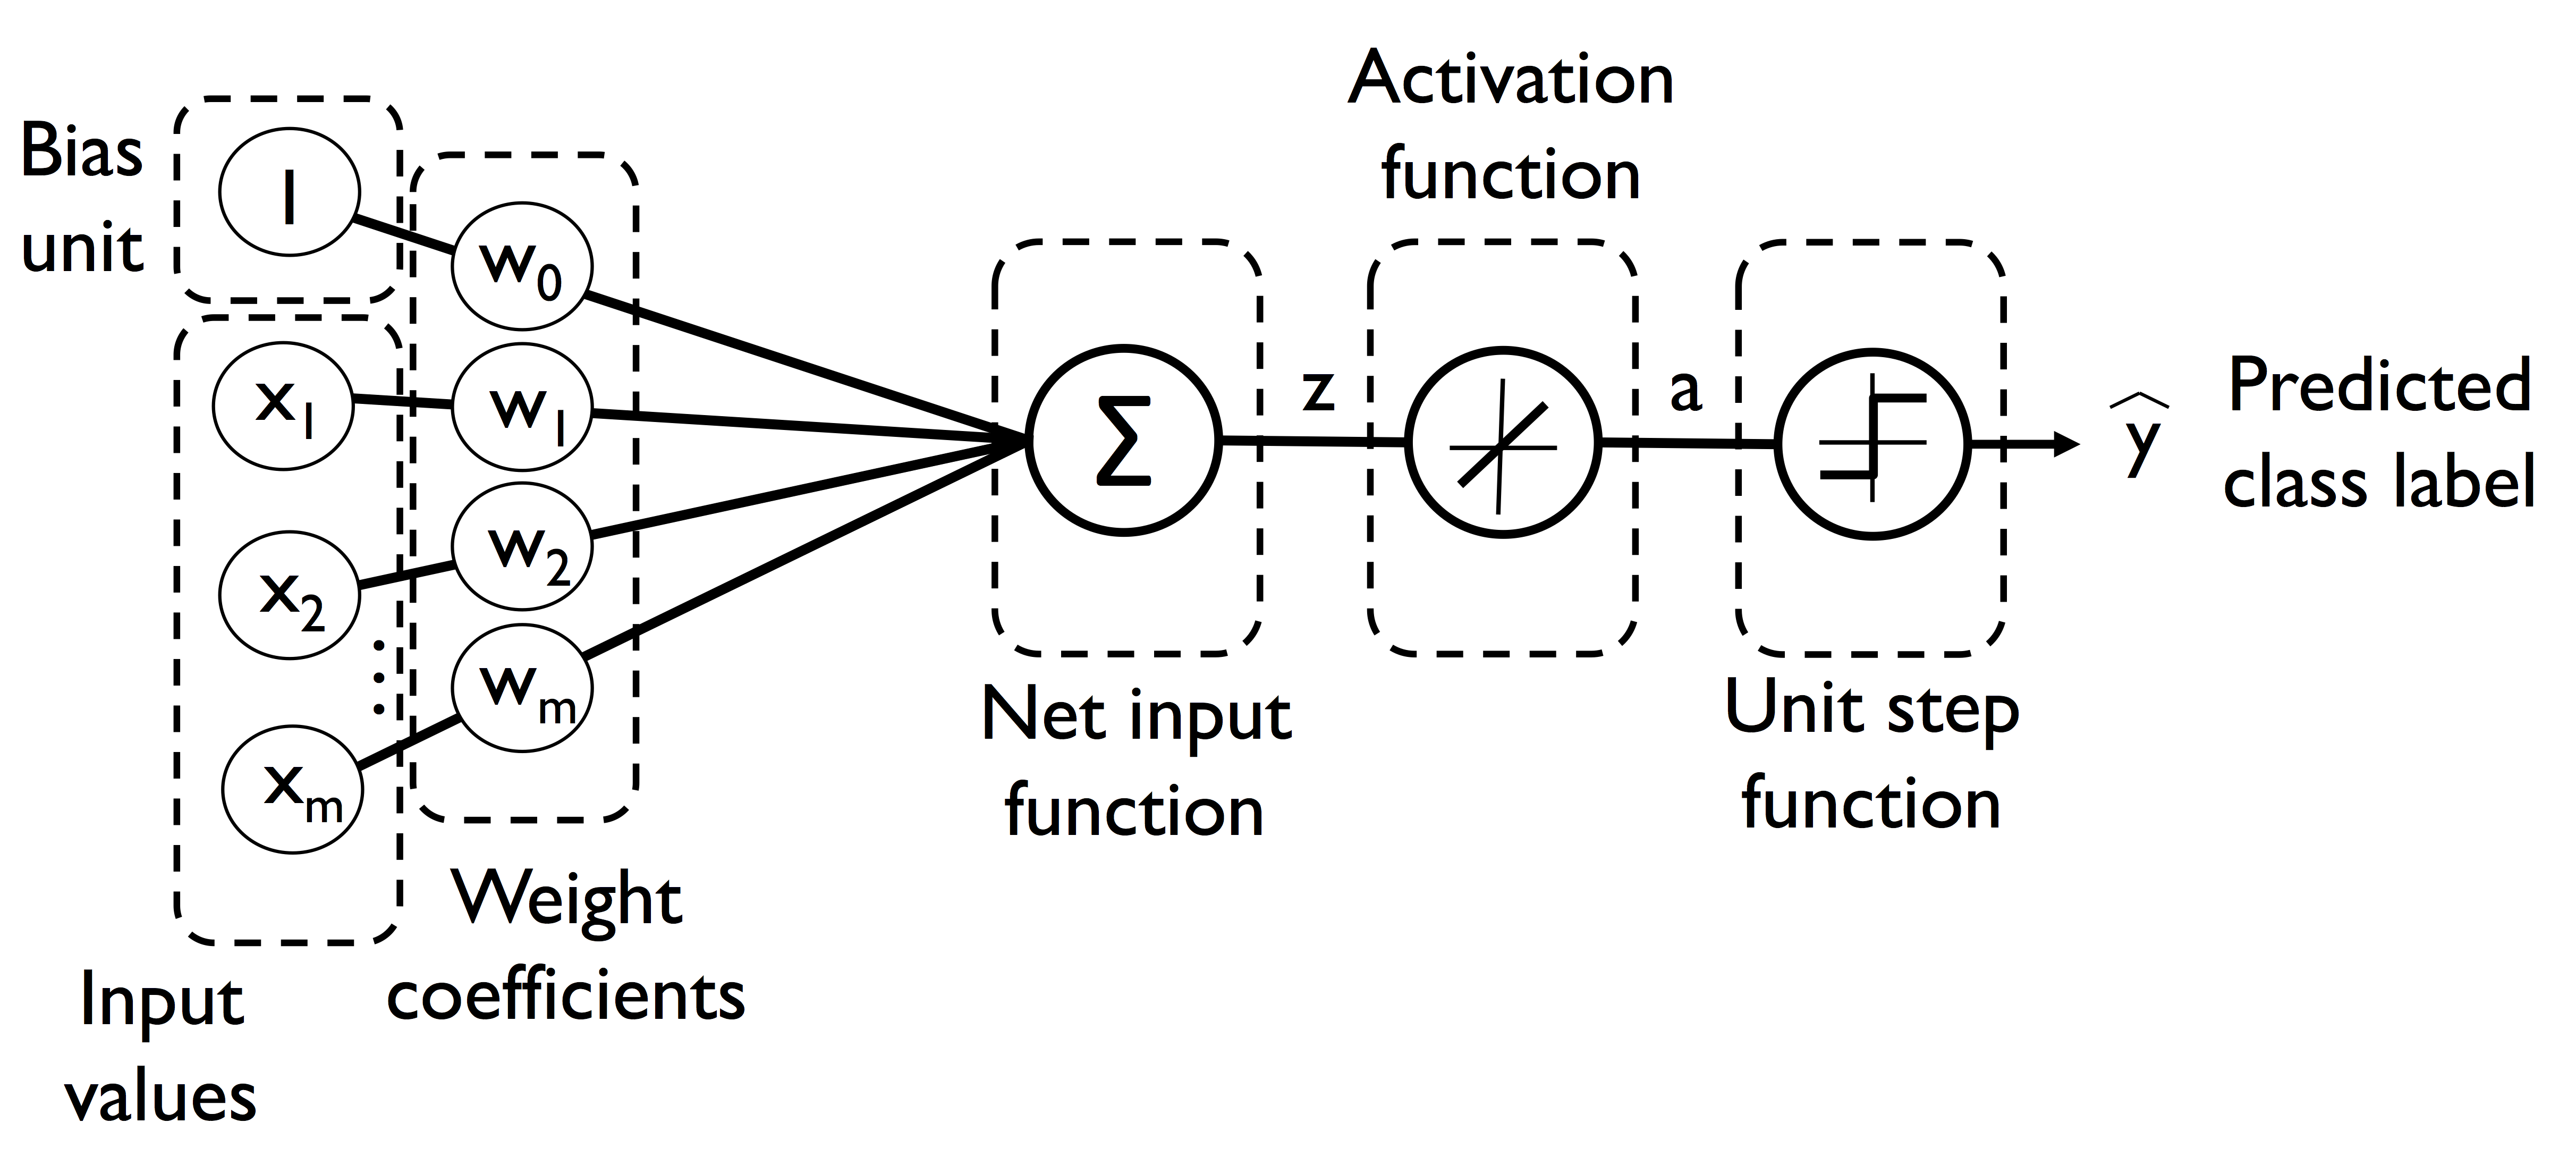

In [1]:
from IPython.display import Image

Image(filename=r'clase17/17_1.png', width=600)

* Para ajustar el modelo ADALINE, utilizamos el **Descenso de Gradiente** para actualizar los pesos $w$ en cada iteración:

    $w:=w+\Delta w$
    
    $\Delta w=-\eta\nabla J(w)$


* Para encontrar los pesos óptimos del modelo, usamos como función de costo $J(w)$ la **Suma de Errores Cuadrados (SSE).**

     $SSE = J(w) = \frac{1}{2}\sum_{i}(y^{(i)}-\phi(z^{(i)}))^2$


* **Para calcular el gradiente de la función de costo, necesitamos calcular la derivada parcial de la función de costo con respecto a cada peso $w_j$**:

    $\frac{\partial J}{\partial w_j} = -\sum_{i}(y^{(i)}-\phi(z^{(i)}))x_j^{(i)}$


* **Así, podemos escribir la actualización del peso $w_j$ como**:

    $\Delta w_j = -\eta\frac{\partial J}{\partial w_j} = \eta \sum_{i}(y^{(i)}-\phi(z^{(i)}))x_j^{(i)}$


* **Dado que actualizamos todos los pesos simultáneamente, la regla de aprendizaje en Adaline es**:

    $w_j := w_j + \Delta w_j$


* Para ADALINE, además definimos: 

    $\phi(z)=z=a$
    
    $z=\sum_jw_jx_j=w^Tx$


* **NOTA: Estandarización para el Descenso de Gradiente**

## Arquitectura de un MLP

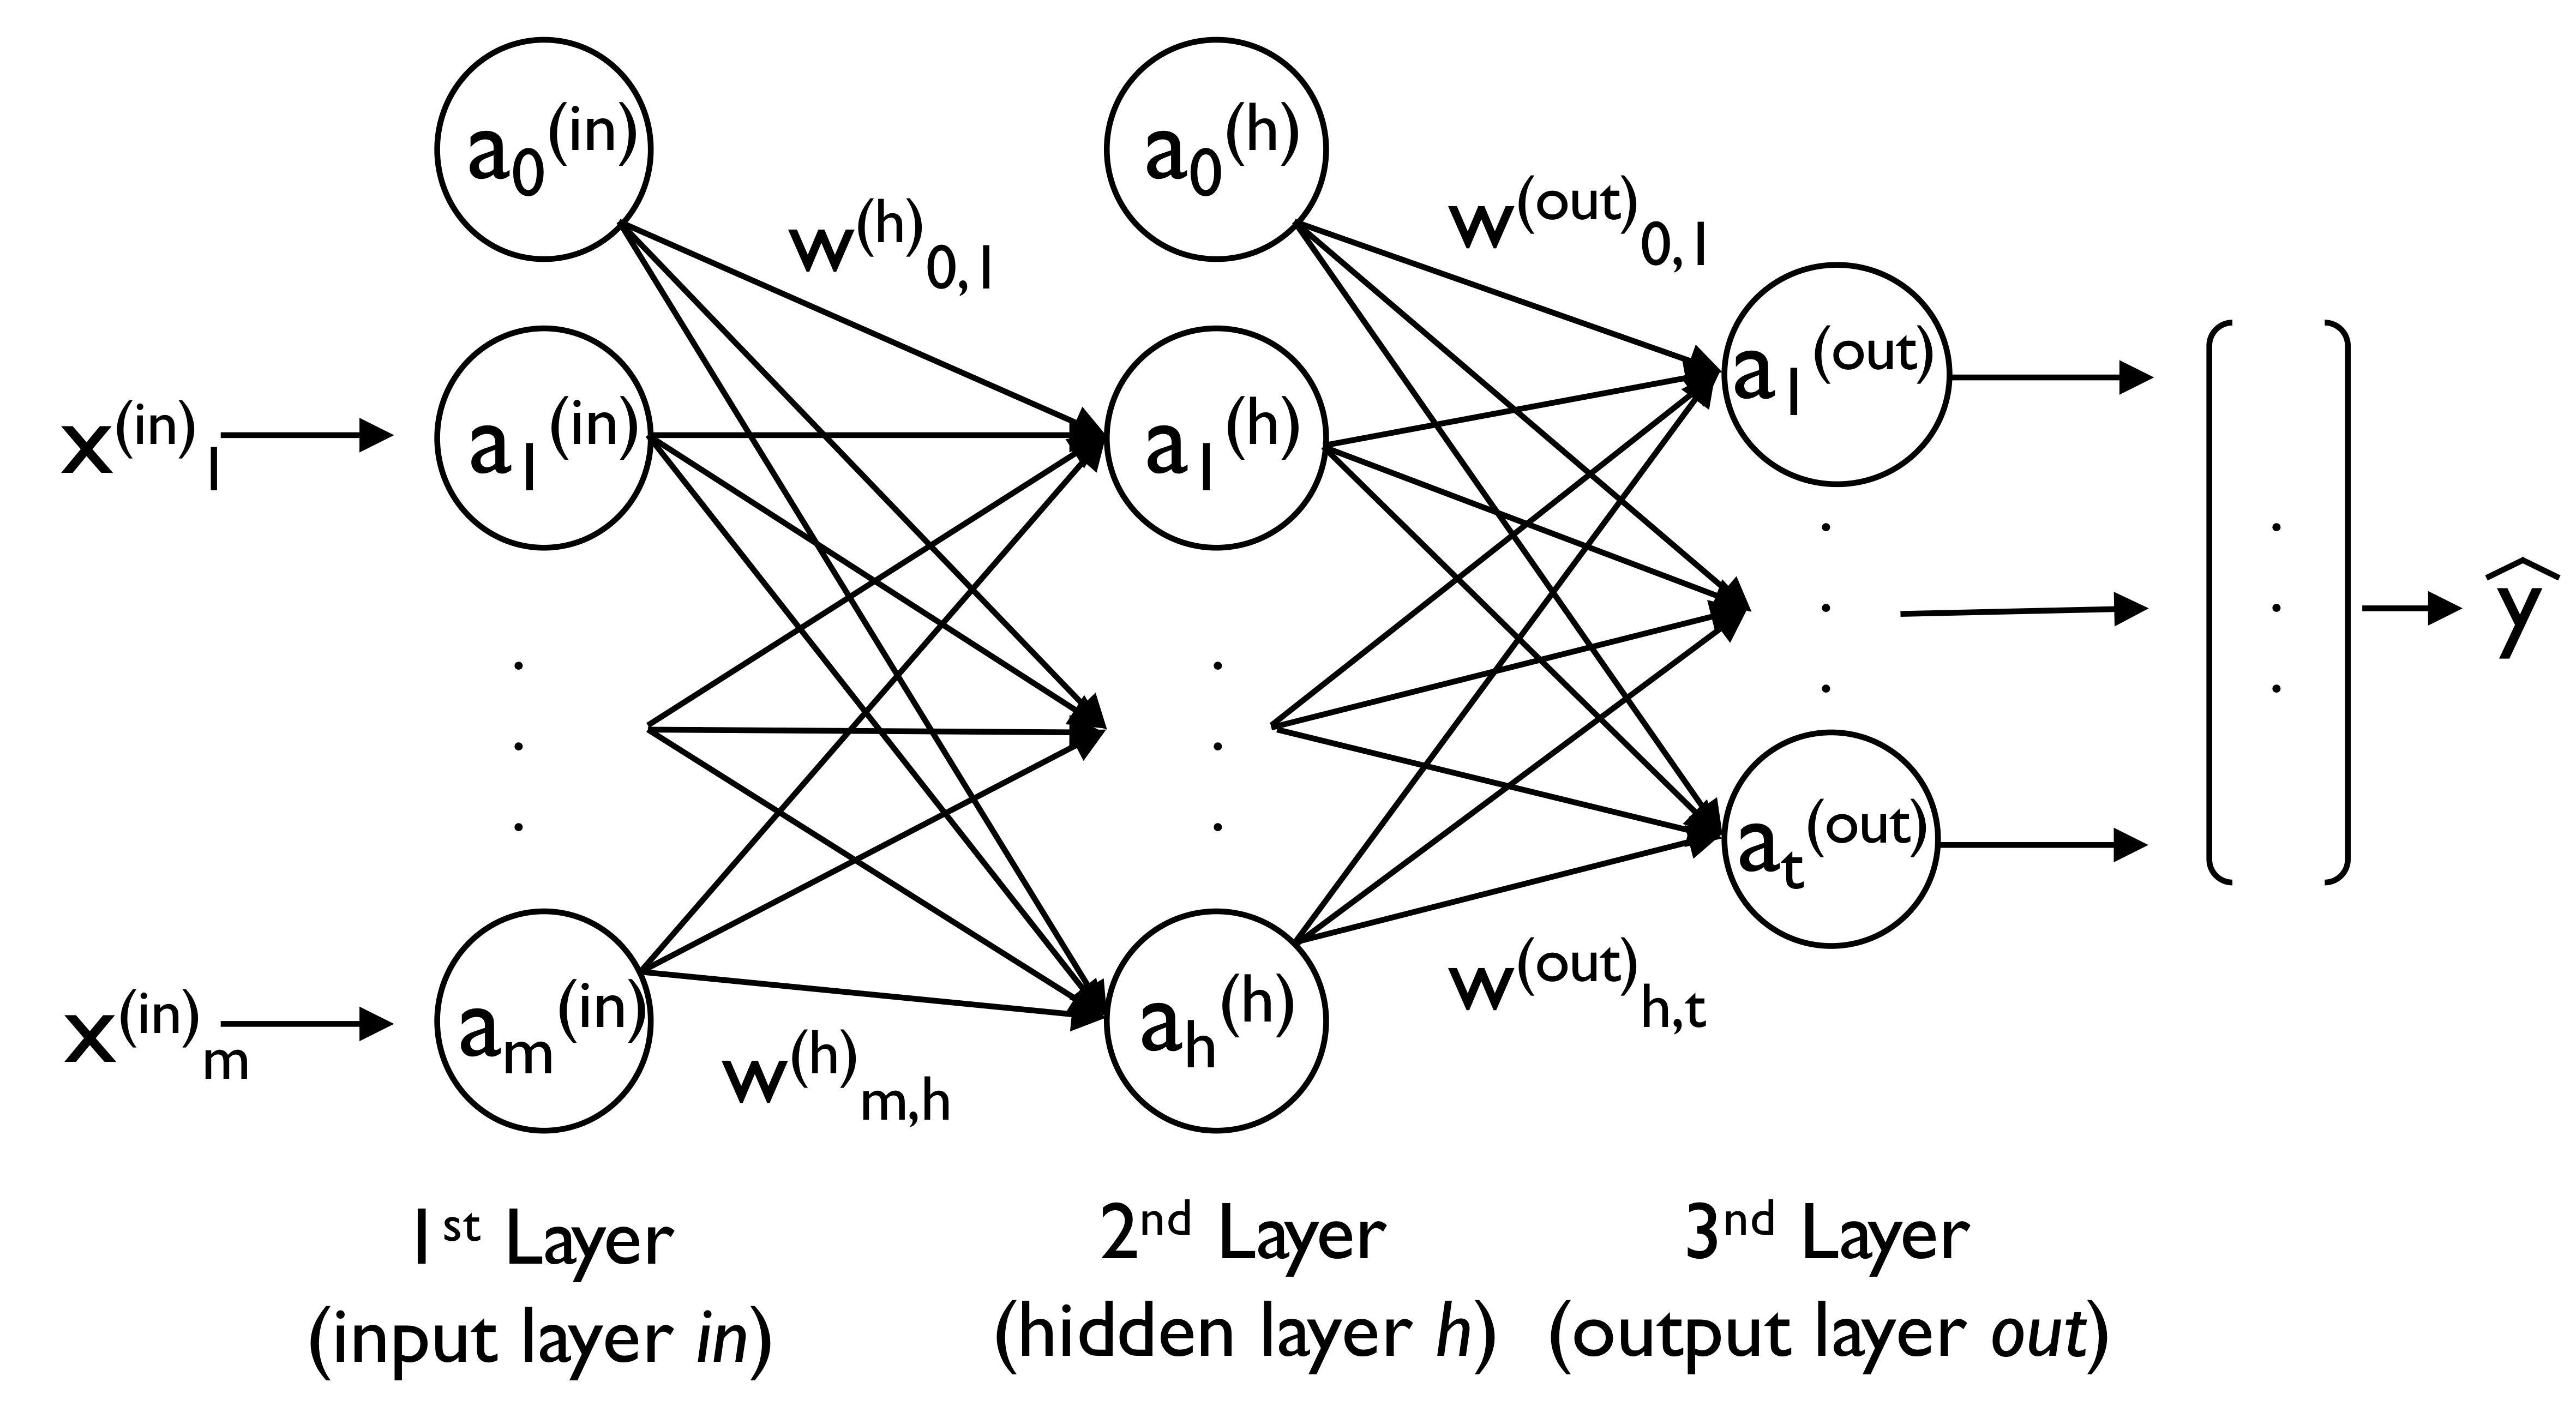

In [2]:
Image(filename=r'clase17/17_2.png', width=600)

* **Cada unidad de la capa $l$ está conectada a todas las unidades de la capa $l+1$ mediante un coeficiente de peso.**


* **La conexión entre la k-ésima unidad en la capa $l$ y la j-ésima unidad en la capa $l+1$ se escribirá como $w_{k,j}^{(l)}$.**


* En la figura anterior, la **matriz de pesos** que conecta la entrada con la capa oculta la llamamos $W^{(h)}$, y denotamos como $W^{(out)}$ a la **matriz (de pesos)** que conecta la capa oculta con la capa de salida.


* En la figura anterior, $W^{(h)}\in \mathbb{R}^{(m+1)\times h}$. 


* **¿Cuál es la dimensión de $W^{(out)}$?**


### Capa de Activación de una Red Neuronal

* Dado que cada unidad de la capa oculta está conectada a todas las unidades de las capas de entrada, calculamos la unidad de activación de la capa oculta $a_1^{(h)}$ como:

    $z_1^{(h)}=a_0^{(in)}w_{0,1}^{(h)}+a_1^{(in)}w_{1,1}^{(h)}+\cdots+a_m^{(in)}w_{m,1}^{(h)}$
    
    $a_1^{(h)}=\phi\left(z_1^{(h)}\right)$
    
    **$\phi(\cdot):$ Función de Activación**
    

* **La Función de Activación debe ser diferenciable.** 


* Para resolver problemas complejos, necesitamos una función de activación **no lineal**.


* Una función de activación muy usada es la **Sigmoide**:

    $\phi(z)=\dfrac{1}{1+e^{-z}}$

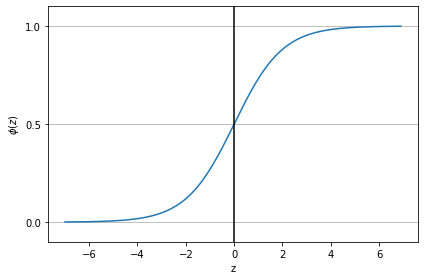

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
#plt.savefig('images/03_02.png', dpi=300)
plt.show()

* También es muy usada la **Tangente Hiperbólica**:

    $tanh(z) = \dfrac{e^{z}-e^{-z}}{e^{z}+e^{-z}}$

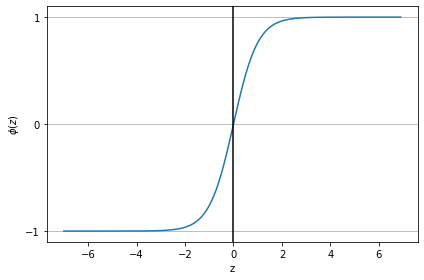

In [4]:
def tanh(z):
    return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = tanh(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-1.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y axis ticks and gridline
plt.yticks([-1., 0., 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
#plt.savefig('images/03_02.png', dpi=300)
plt.show()

De esta forma definido, el MLP es un ejemplo típico de **red neuronal artificial feedforward**. El término **feedforward** se refiere al hecho de que cada capa sirve de entrada a la capa siguiente, sin bucles (Redes Recurrentes).


Intuitivamente, podemos pensar en las neuronas del MLP como unidades de regresión logística que devuelven valores en el rango continuo entre 0 y 1 (en el caso con activación sigmoide).

## Entrenamiento de un MLP para la clasificación

* Función de Costo Logístico:

    $J(w)=-\sum_{i=1}^n y^{[i]}log\left(a^{[i]}\right)+\left(1-y^{[i]}\right)log\left(1-a^{[i]}\right)$

    $a^{[i]}:$ activación (sigmoide) de la i-ésima muestra en el conjunto de datos.

    $a^{[i]}=\phi\left(z^{[i]}\right)$


* Ahora, podemos añadir un término de regularización, que nos permite reducir el grado de sobreajuste.

    $L2=\lambda \left\|w\right\|_2^2=\lambda\sum_{j=1}^mw_j^2$


* Añadiendo el término de regularización $L2$ a la función de coste logístico, obtenemos la siguiente ecuación:

    $J(w)=-\left[\sum_{i=1}^n y^{[i]}log\left(a^{[i]}\right)+\left(1-y^{[i]}\right)log\left(1-a^{[i]}\right)\right]+\dfrac{\lambda}{2} \left\|w\right\|_2^2$


* Para un **problema Multiclase**, por ejemplo, con $t$ clases, necesitamos generalizar la función de coste logístico a todas las unidades de activación $t$ de la red. Así, la función de coste (sin el término de regularización) se convierte en:

    $J(W)=-\sum_{i=1}^n\sum_{j=1}^t y_j^{[i]}log\left(a^{[i]}_j\right)+\left(1-y_j^{[i]}\right)log\left(1-a^{[i]}_j\right)$


* Para el término de regularización, calculamos la suma de todos los pesos de una capa $l$ (sin el término de sesgo):

    $J(W)=-\left[\sum_{i=1}^n\sum_{j=1}^t y_j^{[i]}log\left(a^{[i]}_j\right)+\left(1-y_j^{[i]}\right)log\left(1-a^{[i]}_j\right)\right]+\dfrac{\lambda}{2}\sum_{l=1}^{L-1}\sum_{i=1}^{u_l}\sum_{j=1}^{u_{l+1}}\left(w_{j,i}^{(l)}\right)^2$

    $u_l$ se refiere al número de unidades en una determinada capa $l$.


* Además, recordemos que el objetivo es minimizar la función de costo $J(W)$; por tanto, necesitamos calcular la derivada parcial de los parámetros $W$ con respecto a cada peso para cada capa de la red:

    $\dfrac{\partial}{\partial w_{j,i}^{(l)}}J(W)$

## Backpropagation

* En esencia, podemos pensar en la **retropropagación** (o backpropagation) como un enfoque muy eficiente desde el punto de vista computacional para **calcular las derivadas parciales de una función de coste compleja**. 


* Nuestro objetivo es utilizar esas derivadas para aprender los **coeficientes de peso** para parametrizar una red neuronal artificial. El reto en la parametrización de las redes neuronales es que normalmente estamos tratando con un número muy grande de coeficientes de peso en un espacio de características de alta dimensión.


* Recordemos la **Regla de la Cadena:**

    $\dfrac{d}{dx}\left[f\left(g\left(x\right)\right)\right]=\dfrac{df}{dg}\cdot\dfrac{dg}{dx}$
    

* Del mismo modo, podemos utilizar la regla de la cadena para una composición de funciones arbitrariamente larga:

    $F(x) = f(g(h(u(v(x)))))$ 
    

* Aplicando la regla de la cadena, podemos calcular la derivada de esta función como:

    $\dfrac{dF}{dx}=\dfrac{d}{dx}F(x)=\dfrac{d}{dx}f\left(g\left(h\left(u\left(v\left(x\right)\right)\right)\right)\right)=\dfrac{df}{dg}\cdot\dfrac{dg}{dh}\cdot\dfrac{dh}{du}\cdot\dfrac{du}{dv}\cdot\dfrac{dv}{dx}$
    
    
* Lo anterior, se puede resolver mediante una técnica conocida como Diferenciación Automática (https://arxiv.org/pdf/1404.7456.pdf).


* Ahora, veremos cómo funciona el **algoritmo de retropropagación** para actualizar los pesos en un modelo MLP.

    $Z^{(h)}=A^{(in)}W^{(h)}\ \ \text{(entrada neta de la capa oculta)}$

    $A^{(h)}=\phi\left(Z^{(h)}\right)\ \ \text{(activación de la capa oculta)}$

    $Z^{(out)}=A^{(h)}W^{(out)}\ \ \text{(entrada neta de la capa de salida)}$

    $A^{(out)}=\phi\left(Z^{(out)}\right)\ \ \text{(activación de la capa de salida)}$

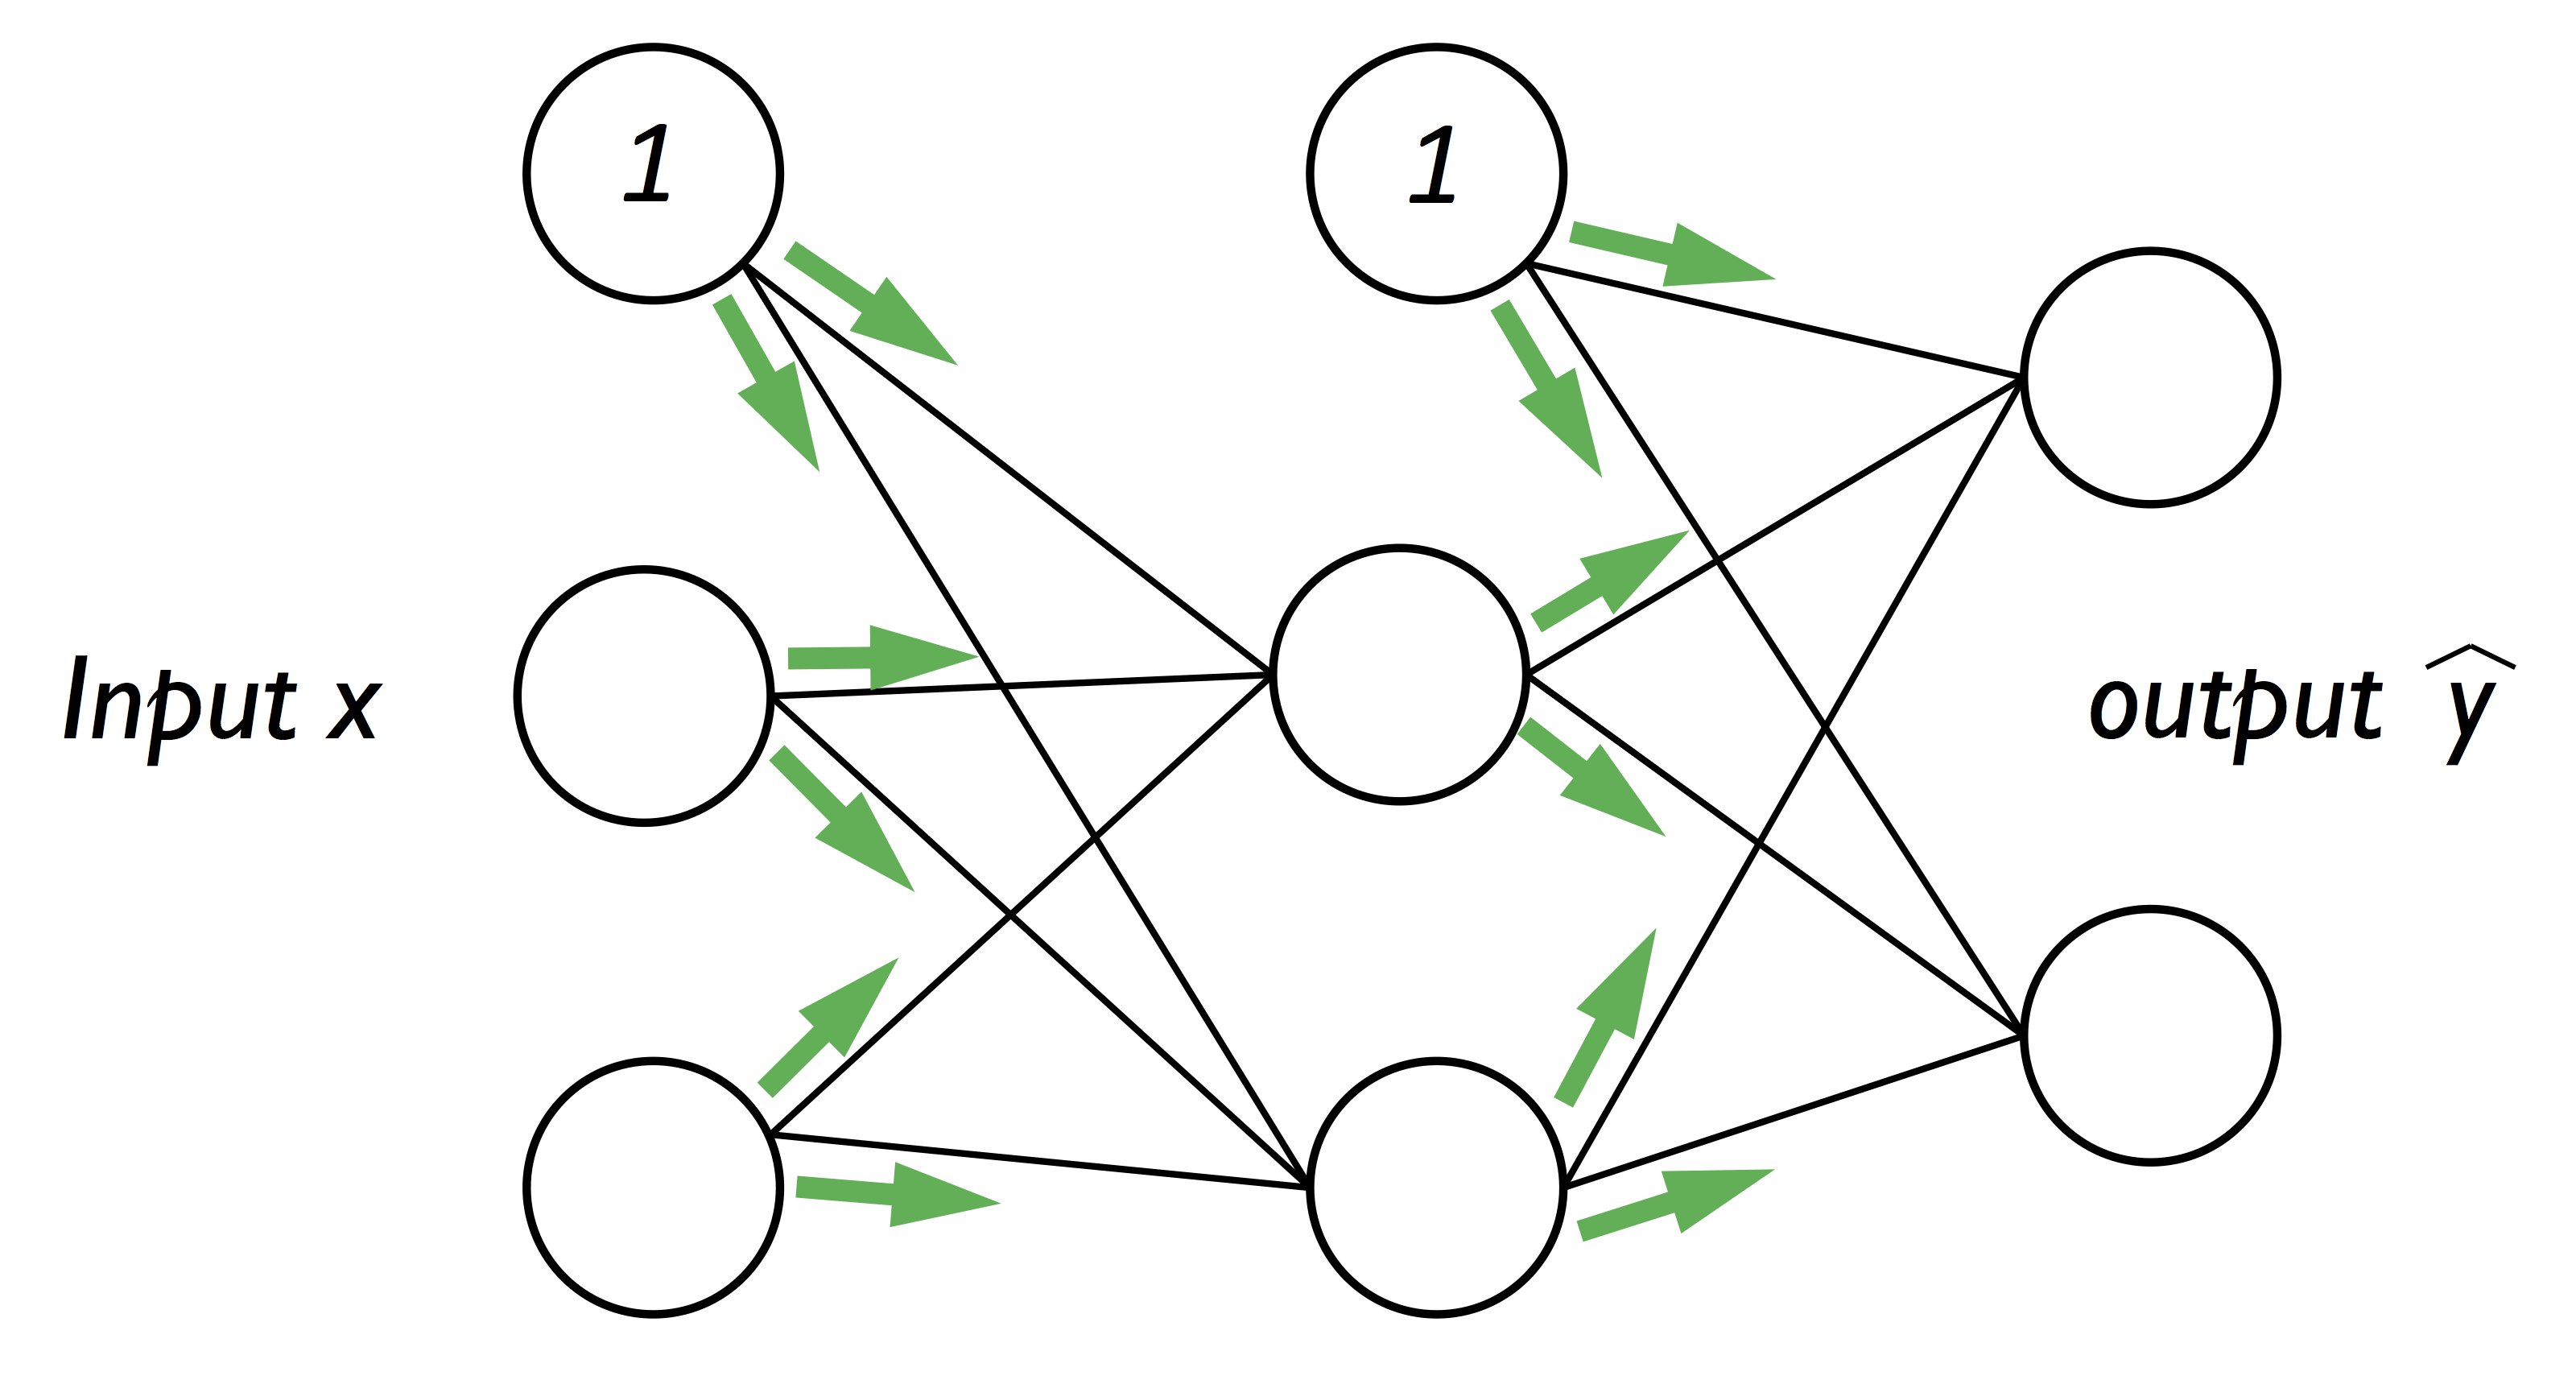

In [6]:
Image(filename=r'clase17/17_3.png', width=500)

* En la retropropagación, propagamos el error de derecha a izquierda. Para esto, comenzamos calculando el vector de error de la capa de salida:

    $\delta^{(out)}=a^{(out)}-y$
    
    $y:$ vector de las etiquetas de clase verdadera


* Luego, calculamos el término de error de la capa oculta:

    $\delta^{(h)}=\delta^{(out)}\left(W^{(out)}\right)^T\odot \dfrac{\partial \phi\left(z^{(h)}\right)}{\partial z^{(h)}}$ (el símbolo $\odot$ significa multiplicación por elementos)


* $\dfrac{\partial\phi\left(z^{(h)}\right)}{\partial z^{(h)}}$ es la derivada de la función de activación sigmoide.

    $\dfrac{\partial \phi\left(z^{(h)}\right)}{\partial z^{(h)}}=\left(a^{(h)}\odot \left(1-a^{(h)}\right)\right)$


* A continuación, calculamos la **matriz de error**, $\delta^{(h)}$, de la capa como:

    $\delta^{(h)}=\delta^{(out)}\left(W^{(out)}\right)^T\odot \left(a^{(h)}\odot \left(1-a^{(h)}\right)\right)$


* Finalmente, después de obtener los términos $\delta$, podemos escribir la **derivada parcial respecto a cada peso de la función de coste** como:

    $\dfrac{\partial}{\partial w_{i,j}^{(out)}}J(W)=a_j^{(h)}\delta_i^{(out)}$

    $\dfrac{\partial}{\partial w_{i,j}^{(h)}}J(W)=a_j^{(in)}\delta_i^{(h)}$


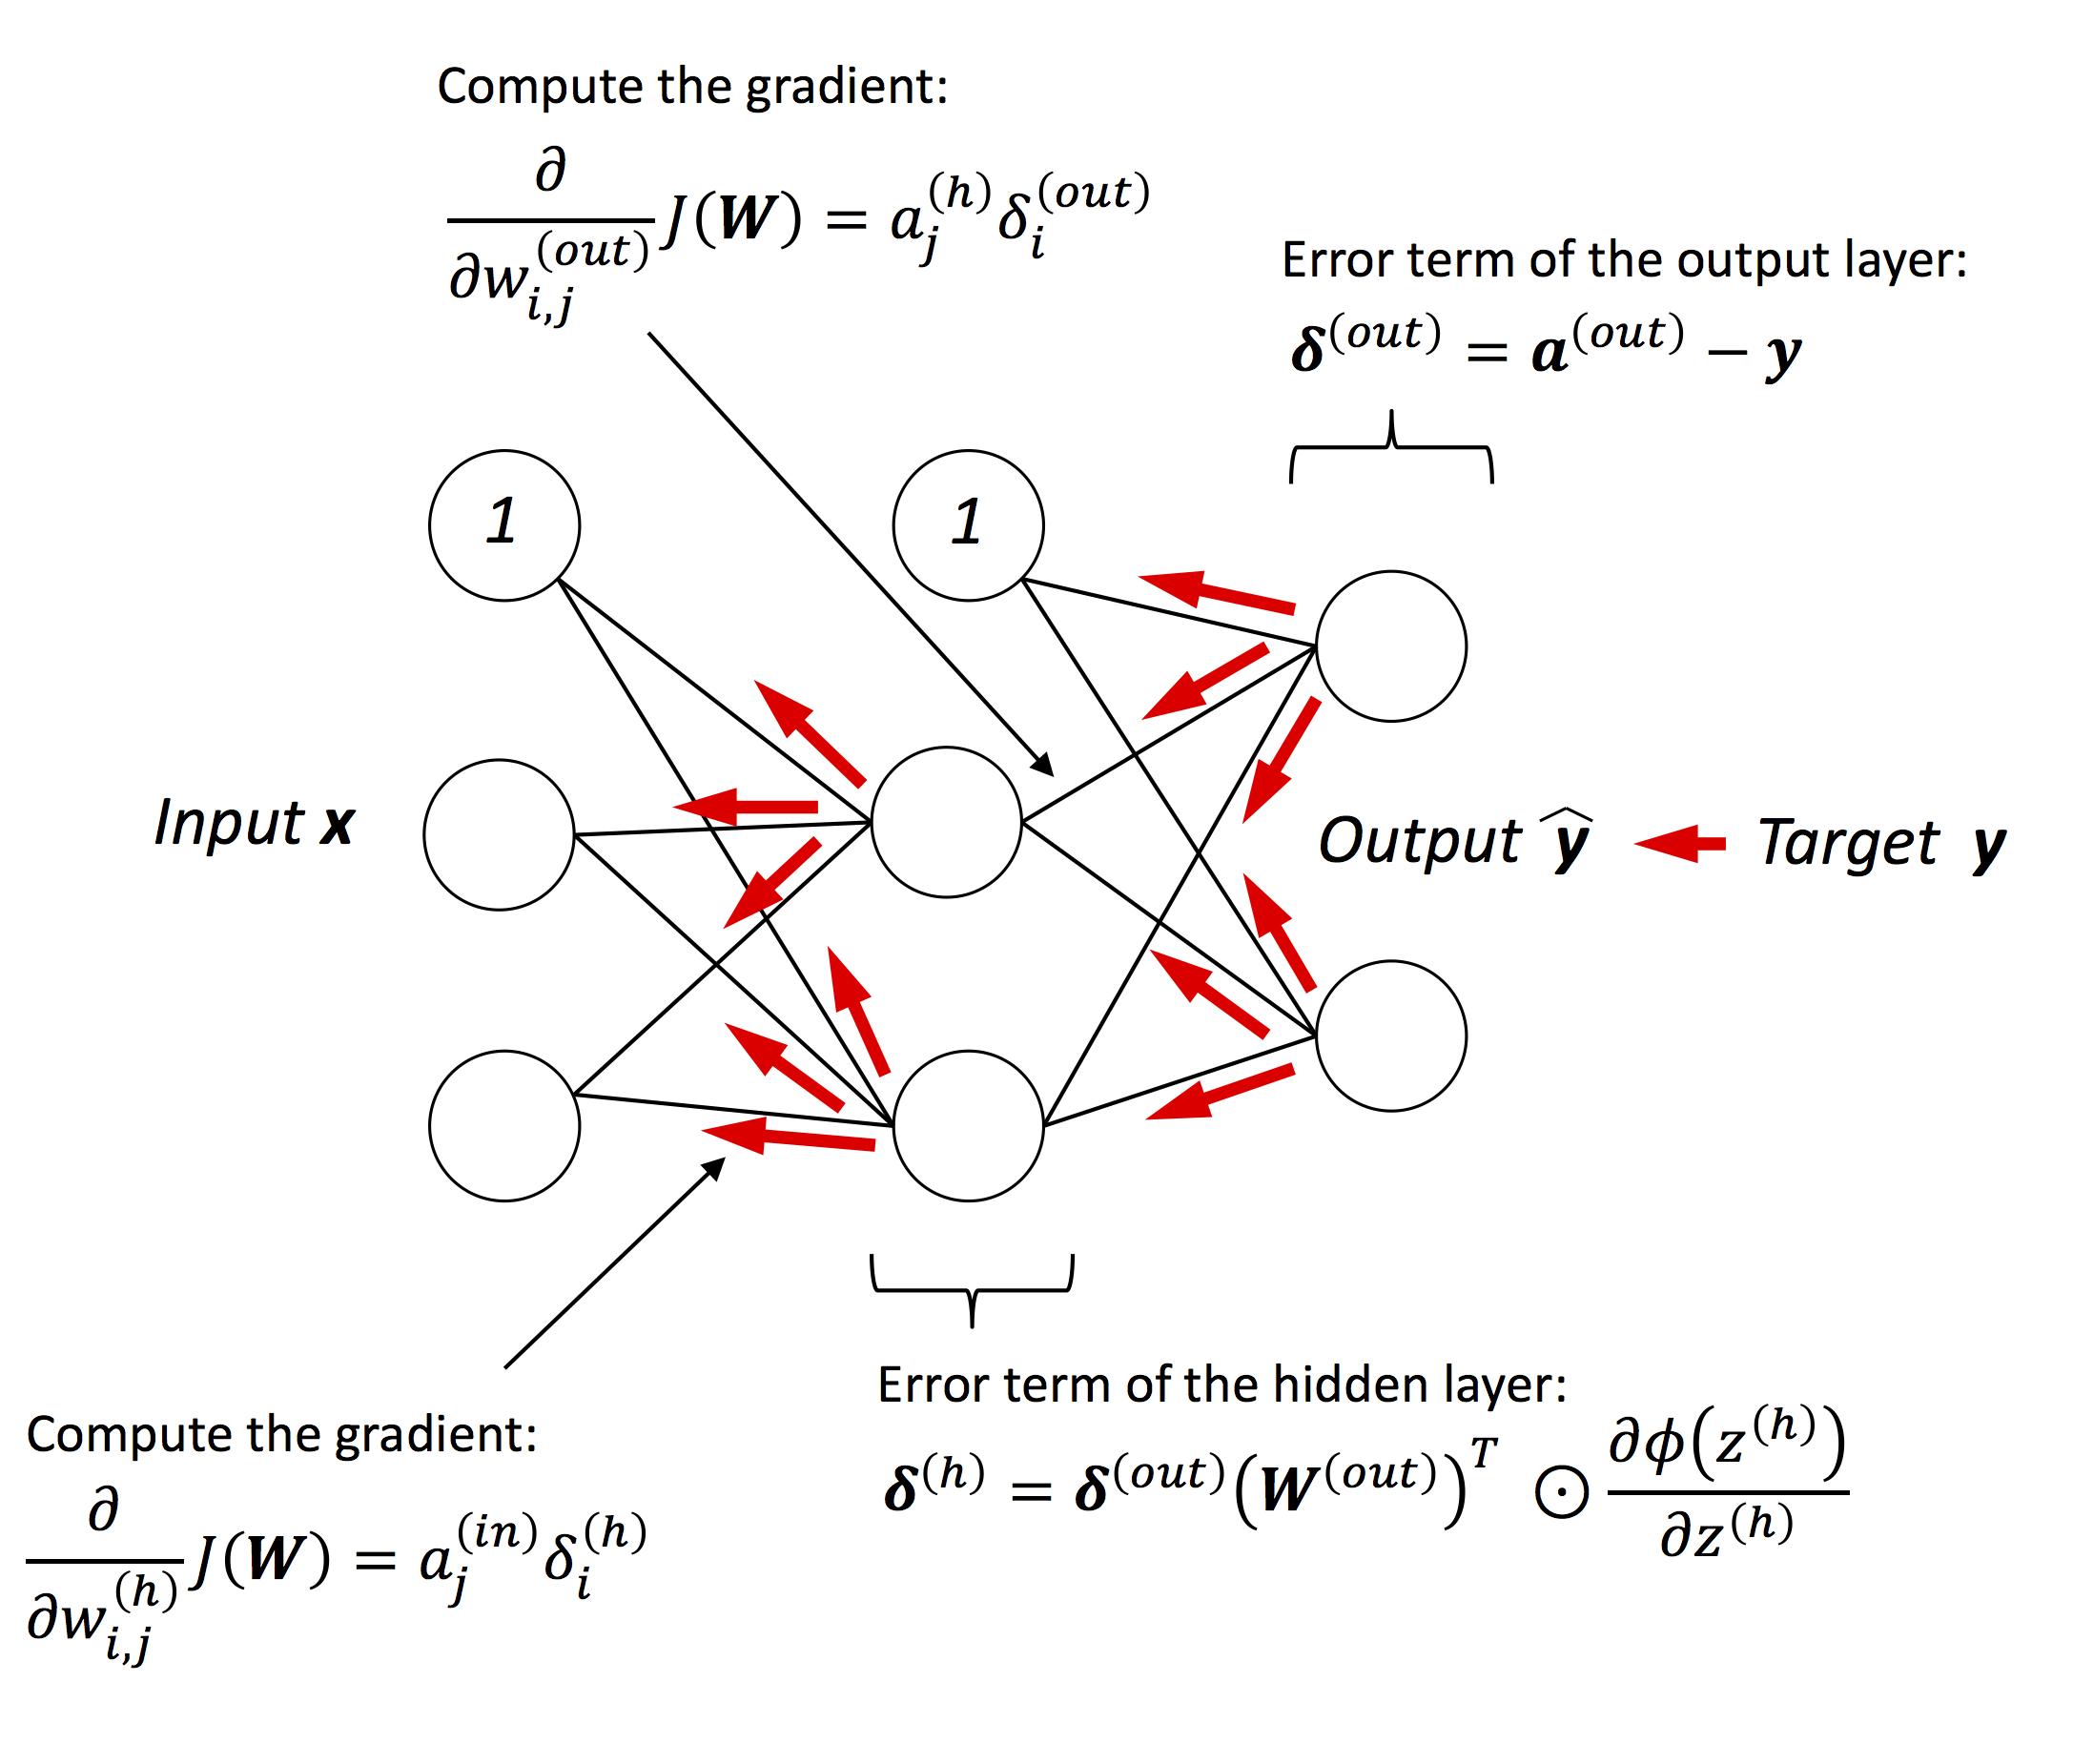

In [7]:
Image(filename=r'clase17/17_4.png', width=500)

* Luego, tenemos que **acumular la derivada parcial de cada nodo en cada capa y el error del nodo en la capa siguiente**. Sin embargo, recordemos que tenemos que calcular $\Delta_{i,j}^{(h)}$ para cada muestra del conjunto de entrenamiento.

    $\Delta^{(h)}=\Delta^{(h)}+\left(A^{(in)}\right)^T\delta^{(h)}$

    $\Delta^{(out)}=\Delta^{(out)}+\left(A^{(h)}\right)^T\delta^{(out)}$


* Después de haber acumulado las derivadas parciales, podemos añadir el término de regularización:

    $\Delta^{(l)}:=\Delta^{(l)}+\lambda^{(l)}\ \ \text{(excepto el término de sesgo)}$


* Por último, después de haber calculado los gradientes, **ahora podemos actualizar los pesos dando un paso opuesto al gradiente para cada capa $l$:**

    $W^{(l)}:=W^{(l)}-\eta\Delta^{(l)}$

#### Comentario final

* A diferencia de las funciones de coste en las redes neuronales de una sola capa (como Adaline o la regresión logística), la superficie de error de **la función de coste de una red neuronal multicapa no es convexa ni suave con respecto a los parámetros**. Hay muchos baches en esta superficie de coste de alta dimensión (mínimos locales) que tenemos que superar para encontrar el mínimo global de la función de coste.

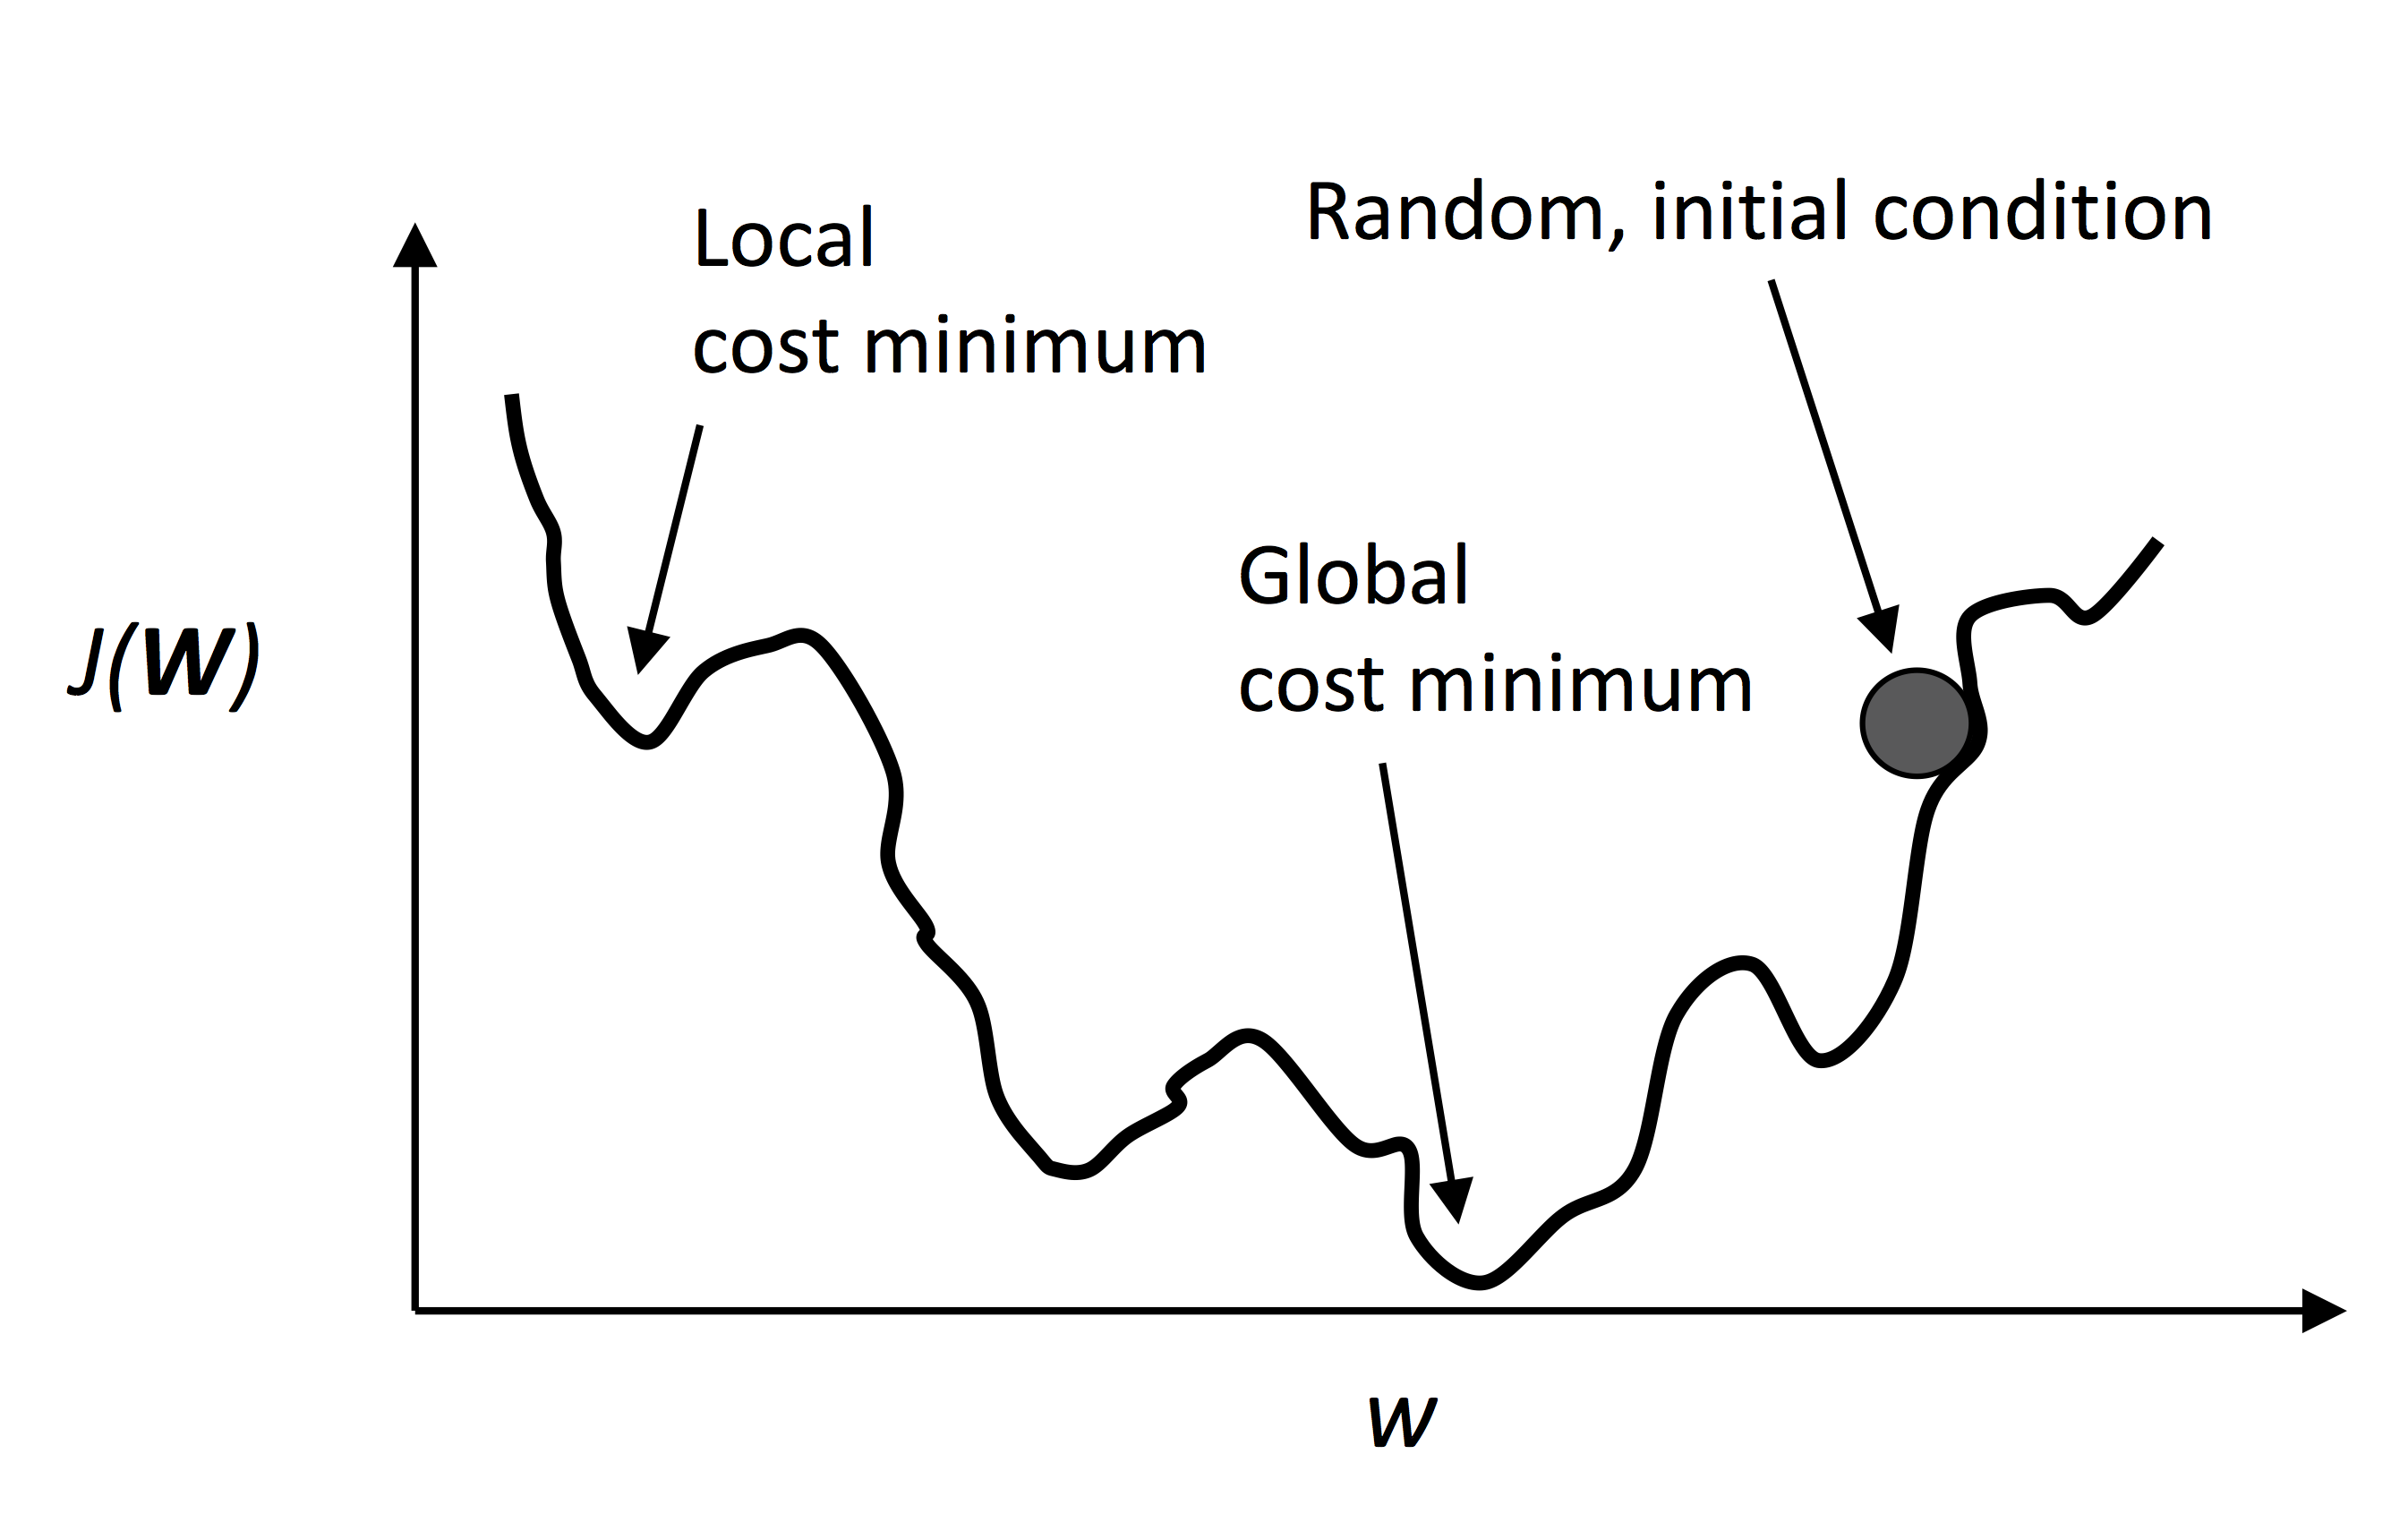

In [8]:
Image(filename=r'clase17/17_5.png', width=500)